In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
! ls data

bom.movie_gross.csv  title.akas.csv       title.ratings.csv
name.basics.csv      title.basics.csv     tmdb.movies.csv
rt.movie_info.tsv    title.crew.csv       tn.movie_budgets.csv
rt.reviews.tsv       title.principals.csv


In [4]:
# Title, Studio, Domestic Gross, Foreign Gross, Year
movie_gross_df = pd.read_csv('data/bom.movie_gross.csv')

# Name of Crew/Principal, Primary Profession, Known for Titles
people_info_df = pd.read_csv('data/name.basics.csv')

# ID, Rating, Genre, Director, Writer, Theater Date, Box Office, Runtime, Studio
rt_movie_info_df = pd.read_csv('data/rt.movie_info.tsv', delimiter='\t')

# ID, Rating, Fresh, Top Critic
rt_movie_reviews_df = pd.read_csv('data/rt.reviews.tsv', delimiter='\t', encoding='latin1')

# Title ID, Title, Region, Language
title_akas_df = pd.read_csv('data/title.akas.csv')

# Title ID (tconst), Primary Title, Original Title, Year, Runtime, Genres
title_basics_df = pd.read_csv('data/title.basics.csv')

# Title ID (tconst), Directors (nconst), Writers (nconst)
title_crew_df = pd.read_csv('data/title.crew.csv')

# Title ID (tconst), People (nconst), Category (primary profession)
title_principals_df = pd.read_csv('data/title.principals.csv')

# Titled ID (tconst), Rating, Num Votes
title_ratings_df = pd.read_csv("data/title.ratings.csv")

# Genre, Language, Original Title, Popularity, Date, Title, Average Rating, Num of Ratings
tmdb_movies_df = pd.read_csv('data/tmdb.movies.csv')

# Release Date, Title, Budget, Domestic Gross, Worldwide Gross
movie_budgets_df = pd.read_csv('data/tn.movie_budgets.csv')


#### Rotten Tomatoes Movie Info Data

The rotten tomatoes movie info dataset includes records from 1921 to 2018 and includes a wide variety of movie genres, directors, writers studios and box office numbers

In [5]:
rt_movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [6]:
rt_movie_info_df.head(10)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117 minutes,NaN
9,15,When a diamond expedition in the Congo is lost...,PG-13,Action and Adventure|Mystery and Suspense|Scie...,Frank Marshall,John Patrick Shanley,"Jun 9, 1995","Jul 27, 1999",NaN,NaN,108 minutes,NaN


In [7]:
print("rt_movie_info_df Columns: ", list(rt_movie_info_df.columns))
print("rt_movie_info_df Shape: ", rt_movie_info_df.shape)

rt_movie_info_df Columns:  ['id', 'synopsis', 'rating', 'genre', 'director', 'writer', 'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime', 'studio']
rt_movie_info_df Shape:  (1560, 12)


In [8]:
rt_movie_info_df["genre_clean"] = rt_movie_info_df["genre"].str.replace("|",",").str.split(",")

In [9]:
rt_movie_info_df.explode("genre_clean")["genre_clean"].value_counts()

Drama                          912
Comedy                         550
Action and Adventure           366
Mystery and Suspense           309
Art House and International    265
Romance                        198
Classics                       193
Science Fiction and Fantasy    172
Horror                         134
Kids and Family                 99
Musical and Performing Arts     98
Documentary                     69
Special Interest                61
Western                         48
Animation                       47
Television                      23
Faith and Spirituality          11
Sports and Fitness              10
Cult Movies                      4
Gay and Lesbian                  2
Anime and Manga                  2
Name: genre_clean, dtype: int64

In [10]:
rt_movie_info_df["rating"].value_counts()

R        521
NR       503
PG       240
PG-13    235
G         57
NC17       1
Name: rating, dtype: int64

In [11]:
rt_movie_info_df["studio"].value_counts()[:10]

Universal Pictures        35
Paramount Pictures        27
20th Century Fox          26
Sony Pictures Classics    22
Warner Bros. Pictures     21
Sony Pictures             16
Columbia Pictures         10
New Line Cinema           10
IFC Films                  9
Warner Bros.               8
Name: studio, dtype: int64

In [12]:
rt_movie_info_df["studio"].unique()

array([nan, 'Entertainment One', 'Warner Bros. Pictures',
       'Paramount Pictures', 'Sony Pictures Classics',
       'Showtime Documentary Films', 'Seventh Art Releasing',
       'ATO Pictures', 'Sony Pictures', 'Universal Pictures', 'MGM',
       'After Dark Films/Freestyle Releasing', 'Lions Gate Films',
       'Regent Releasing', 'Janus Films', 'The Weinstein Company',
       'New Line Cinema', 'Walt Disney Pictures', 'FilmDistrict',
       '20th Century Fox', 'Summit Entertainment', 'Newmarket Film Group',
       'Samuel Goldwyn Films', 'Open Road Films', 'Warner Bros.', 'Fox',
       'Screen Media Films', 'Roadside Attractions',
       'Buena Vista Pictures', 'DreamWorks SKG',
       'Buena Vista Distribution Compa', 'New Yorker Films', 'STXfilms',
       'Destination Films', 'Miramax', 'Paramount Studios',
       'Arrowstorm Entertainment', 'Inception Media Group',
       'Fine Line Features', 'Columbia Pictures', 'IFC Films',
       'Dreamworks Pictures', 'Film District', 'Re

In [13]:
rt_movie_info_df["box_office"] = pd.to_numeric(rt_movie_info_df['box_office'].str.replace(",",""))
rt_movie_info_df["box_office"].nlargest(10)

827     368000000.0
877     303001229.0
1188    299300000.0
690     279167575.0
1117    261835892.0
966     257704099.0
504     241250669.0
657     234141872.0
1458    227946274.0
1237    214813155.0
Name: box_office, dtype: float64

#### Rotten Tomatoes Movie Review Data

The rotten tomatoes review dataset includes records of reviews, ratings and critic information

In [14]:
rt_movie_reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [15]:
rt_movie_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [16]:
print("RT Reviews Columns: ", list(rt_movie_reviews_df.columns))
print("RT Reviews Shape: ", rt_movie_reviews_df.shape)

RT Reviews Columns:  ['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher', 'date']
RT Reviews Shape:  (54432, 8)


In [17]:
rt_movie_reviews_df["fresh"].value_counts()

fresh     33035
rotten    21397
Name: fresh, dtype: int64

In [18]:
rt_movie_reviews_df["top_critic"].value_counts()

0    41336
1    13096
Name: top_critic, dtype: int64

In [19]:
rt_merge = pd.merge(rt_movie_info_df, rt_movie_reviews_df,how="left", on="id")

In [22]:
rt_merge["top_critic"].value_counts()

0.0    41336
1.0    13096
Name: top_critic, dtype: int64

In [66]:
print("RT Merge Columns: ", list(rt_merge.columns))
print("RT Merge Shape: ", rt_merge.shape)

RT Merge Columns:  ['id', 'synopsis', 'rating_x', 'genre', 'director', 'writer', 'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime', 'studio', 'genre_clean', 'review', 'rating_y', 'fresh', 'critic', 'top_critic', 'publisher', 'date']
RT Merge Shape:  (54857, 20)


In [67]:
rt_merge.explode("genre_clean")["genre_clean"].value_counts()

Drama                          33841
Comedy                         21914
Action and Adventure           13028
Mystery and Suspense           11828
Romance                         8129
Science Fiction and Fantasy     7408
Kids and Family                 4631
Art House and International     4610
Horror                          4316
Animation                       2673
Classics                        2164
Musical and Performing Arts     2160
Western                         1260
Documentary                     1147
Special Interest                 880
Sports and Fitness               410
Television                       206
Faith and Spirituality           194
Cult Movies                       55
Gay and Lesbian                   42
Anime and Manga                   33
Name: genre_clean, dtype: int64

<AxesSubplot:ylabel='genre_clean'>

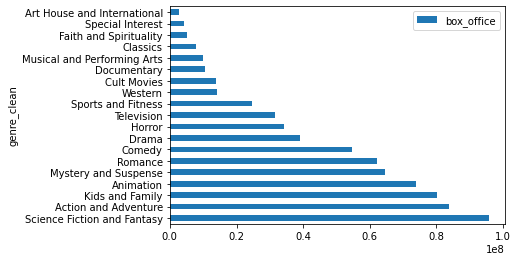

In [116]:
rt_merge.explode("genre_clean").pivot_table(index="genre_clean",values="box_office",aggfunc={"box_office": "mean"}).sort_values("box_office",ascending=False).plot.barh(stacked=True)


<AxesSubplot:ylabel='genre_clean'>

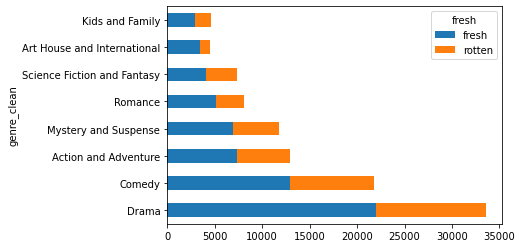

In [101]:
table_merge = pd.pivot_table(rt_merge.explode("genre_clean"),index=["genre_clean"],columns="fresh",aggfunc="size")
table_merge.sort_values("fresh",ascending=False)[:8].plot.barh(stacked=True)

In [95]:
table_merge["fresh_rotten_ratio"] = table_merge.fresh/table_merge.rotten
table_merge.sort_values("fresh",ascending=False)

fresh,fresh,rotten,fresh_rotten_ratio
genre_clean,,,
Drama,21945,11659,1.882237
Comedy,12880,8922,1.443623
Action and Adventure,7334,5578,1.314808
Mystery and Suspense,6874,4872,1.410920
Romance,5168,2920,1.769863
Science Fiction and Fantasy,4031,3333,1.209421
Art House and International,3428,1094,3.133455
Kids and Family,2864,1745,1.641261
Horror,1994,2289,0.871123


In [143]:
studio_df = rt_merge.loc[(rt_merge["studio"] == "Universal Pictures")|
                         (rt_merge["studio"] == "Paramount Pictures")|
                         (rt_merge["studio"] == "20th Century Fox")|
                         (rt_merge["studio"] == "Sony Pictures Classics")|
                         (rt_merge["studio"] == "Warner Bros. Pictures")|
                         (rt_merge["studio"] == "New Line Cinema")|
                         (rt_merge["studio"] == "Columbia Pictures")
                        ]
studio_df.head()

,id,synopsis,rating_x,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,genre_clean,review,rating_y,fresh,critic,top_critic,publisher,date
245,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures,"[Drama, Kids and Family]","Great boy-and-dog tale, but be prepared for te...",4/5,fresh,Nell Minow,0.0,Common Sense Media,"December 26, 2010"
246,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures,"[Drama, Kids and Family]","Not a mawkish dying-dog tearjerker, ""My Dog Sk...",3.5/4,fresh,Nick Rogers,0.0,The Film Yap,"September 19, 2010"
247,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures,"[Drama, Kids and Family]",Features two irresistible lead characters -- a...,2.5/4,fresh,Judith Egerton,0.0,"Courier-Journal (Louisville, KY)","July 1, 2004"
248,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures,"[Drama, Kids and Family]",A heart-affecting boy-with-a-dog drama.,NaN,fresh,NaN,0.0,Spirituality and Practice,"March 5, 2002"
249,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures,"[Drama, Kids and Family]",An affectionate and tender family film...,C+,rotten,Dennis Schwartz,0.0,Ozus' World Movie Reviews,"February 14, 2001"


In [150]:
studio_df.explode("genre_clean").groupby(["studio","genre_clean"]).count()[:20]

id  synopsis  rating_x  \
studio            genre_clean                                             
20th Century Fox  Action and Adventure          887       887       887   
                  Animation                      59        59        59   
                  Comedy                        810       810       810   
                  Drama                        1200      1200      1200   
                  Horror                         51        51        51   
                  Kids and Family               289       289       289   
                  Musical and Performing Arts     6         6         6   
                  Mystery and Suspense          789       789       789   
                  Romance                       113       113       113   
                  Science Fiction and Fantasy   654       654       654   
                  Television                      6         6         6   
Columbia Pictures Action and Adventure          551       551       551   
                  Animation                     132       132       132   
                  Art House and International    38        38        38   
                  Comedy                        576       576       576   
                  Drama                         770       770       770   
                  Mystery and Suspense          346       346       346   
                  Romance                       431       431       431   
                  Science Fiction and Fantasy   191       191       191   
New Line Cinema   Action and Adventure          227       227       227   

                                               genre  director  writer  \
studio            genre_clean                                            
20th Century Fox  Action and Adventure           887       546     714   
                  Animation                       59        59       0   
                  Comedy                         810       810     745   
                  Drama                         1200       859    1081   
                  Horror                          51        51      51   
                  Kids and Family                289       289     167   
                  Musical and Performing Arts      6         6       0   
                  Mystery and Suspense           789       666     679   
                  Romance                        113       113     113   
                  Science Fiction and Fantasy    654       654     591   
                  Television                       6         6       0   
Columbia Pictures Action and Adventure           551       513     551   
                  Animation                      132       132     132   
                  Art House and International     38         0      38   
                  Comedy                         576       398     436   
                  Drama                          770       592     630   
                  Mystery and Suspense           346       308     346   
                  Romance                        431       291     291   
                  Science Fiction and Fantasy    191       191     191   
New Line Cinema   Action and Adventure           227        84      84   

                                               theater_date  dvd_date  \
studio            genre_clean                                           
20th Century Fox  Action and Adventure                  887       887   
                  Animation                              59        59   
                  Comedy                                810       810   
                  Drama                                1200      1200   
                  Horror                                 51        51   
                  Kids and Family                       289       289   
                  Musical and Performing Arts             6         6   
                  Mystery and Suspense                  789       789   
                  Romance              

In [155]:
studio_df.explode("genre_clean").pivot_table(values="id", index=["genre_clean"],columns="studio",aggfunc="size")
#.sort_values("genre_clean",ascending=False)
#[:8].plot.barh(stacked=True)


studio,20th Century Fox,Columbia Pictures,New Line Cinema,Paramount Pictures,Sony Pictures Classics,Universal Pictures,Warner Bros. Pictures
genre_clean,,,,,,,
Action and Adventure,887.0,551.0,227.0,785.0,164.0,1545.0,472.0
Animation,59.0,132.0,NaN,424.0,NaN,NaN,30.0
Art House and International,NaN,38.0,NaN,NaN,913.0,NaN,NaN
Classics,NaN,NaN,NaN,NaN,NaN,NaN,105.0
Comedy,810.0,576.0,196.0,1528.0,526.0,2230.0,425.0
Documentary,NaN,NaN,NaN,84.0,62.0,NaN,NaN
Drama,1200.0,770.0,387.0,1881.0,1745.0,1898.0,1492.0
Horror,51.0,NaN,471.0,NaN,NaN,508.0,190.0
Kids and Family,289.0,NaN,130.0,424.0,NaN,164.0,311.0


In [28]:
top_critic = rt_merge[rt_merge["top_critic"] == 1.0]
top_critic.head()

,id,synopsis,rating_x,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,genre_clean,review,rating_y,fresh,critic,top_critic,publisher,date
25,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,108 minutes,Entertainment One,"[Drama, Science Fiction and Fantasy]","The rapid dialogue is dry and mannered, like a...",2.5/4,rotten,Joe Williams,1.0,St. Louis Post-Dispatch,"September 6, 2012"
48,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,108 minutes,Entertainment One,"[Drama, Science Fiction and Fantasy]",It feels like each and every moment bursts for...,2/4,rotten,Stephanie Merry,1.0,Washington Post,"August 24, 2012"
51,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,108 minutes,Entertainment One,"[Drama, Science Fiction and Fantasy]","There's not really a movie there, nothing that...",2/4,rotten,Mick LaSalle,1.0,San Francisco Chronicle,"August 23, 2012"
55,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,108 minutes,Entertainment One,"[Drama, Science Fiction and Fantasy]",The film is all too faithful to its un-cinemat...,1.5/4,rotten,Colin Covert,1.0,Minneapolis Star Tribune,"August 23, 2012"
56,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,108 minutes,Entertainment One,"[Drama, Science Fiction and Fantasy]","Cosmopolis,"" because of its allegiance to the ...",2/4,rotten,Moira MacDonald,1.0,Seattle Times,"August 23, 2012"


In [30]:
top_critic.groupby(["top_critic", "fresh"]).count()

id  synopsis  rating_x  genre  director  writer  \
top_critic fresh                                                       
1.0        fresh   7296      7265      7272   7272      6493    5964   
           rotten  5800      5791      5792   5792      5219    4827   

                   theater_date  dvd_date  currency  box_office  runtime  \
top_critic fresh                                                           
1.0        fresh           7089      7089      4418        4418     7223   
           rotten          5711      5711      3740        3740     5708   

                   studio  genre_clean  review  rating_y  critic  publisher  \
top_critic fresh                                                              
1.0        fresh     5424         7272    6950      4482    6983       7295   
           rotten    4455         5792    5426      3574    5553       5800   

                   date  
top_critic fresh         
1.0        fresh   7296  
           rotten  5800

In [45]:
top_critic.pivot_table(index="fresh", columns="id",aggfunc="count")

box_office                                                  ... writer  \
id           3    5    6    8     10    13    14   15   17   19    ...   1981   
fresh                                                              ...          
fresh        17.0  0.0  0.0  0.0  12.0  17.0   3.0  0.0  0.0  NaN  ...    2.0   
rotten       17.0  0.0  0.0  0.0  16.0  15.0  15.0  0.0  0.0  0.0  ...    1.0   

                                                      
id     1986 1987  1992 1993 1995 1996 1997 1999 2000  
fresh                                                 
fresh   0.0  1.0  12.0  NaN  0.0  0.0  4.0  5.0  7.0  
rotten  NaN  NaN   1.0  0.0  0.0  0.0  5.0  7.0  6.0  

[2 rows x 16002 columns]

In [47]:
top_critic[top_critic["id"] == 3.0]

,id,synopsis,rating_x,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,genre_clean,review,rating_y,fresh,critic,top_critic,publisher,date
25,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,108 minutes,Entertainment One,"[Drama, Science Fiction and Fantasy]","The rapid dialogue is dry and mannered, like a...",2.5/4,rotten,Joe Williams,1.0,St. Louis Post-Dispatch,"September 6, 2012"
48,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,108 minutes,Entertainment One,"[Drama, Science Fiction and Fantasy]",It feels like each and every moment bursts for...,2/4,rotten,Stephanie Merry,1.0,Washington Post,"August 24, 2012"
51,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,108 minutes,Entertainment One,"[Drama, Science Fiction and Fantasy]","There's not really a movie there, nothing that...",2/4,rotten,Mick LaSalle,1.0,San Francisco Chronicle,"August 23, 2012"
55,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,108 minutes,Entertainment One,"[Drama, Science Fiction and Fantasy]",The film is all too faithful to its un-cinemat...,1.5/4,rotten,Colin Covert,1.0,Minneapolis Star Tribune,"August 23, 2012"
56,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,108 minutes,Entertainment One,"[Drama, Science Fiction and Fantasy]","Cosmopolis,"" because of its allegiance to the ...",2/4,rotten,Moira MacDonald,1.0,Seattle Times,"August 23, 2012"
59,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,108 minutes,Entertainment One,"[Drama, Science Fiction and Fantasy]",Poor Pattinson does the best he can. He's not ...,2/4,rotten,Mark Feeney,1.0,Boston Globe,"August 23, 2012"
61,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,108 minutes,Entertainment One,"[Drama, Science Fiction and Fantasy]",The story seems to cleave into cerebral disqui...,NaN,fresh,J. R. Jones,1.0,Chicago Reader,"August 23, 2012"
63,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,108 minutes,Entertainment One,"[Drama, Science Fiction and Fantasy]",The movie isn't for everyone. But if it grabs ...,3/4,fresh,Rene Rodriguez,1.0,Miami Herald,"August 23, 2012"
65,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,108 minutes,Entertainment One,"[Drama, Science Fiction and Fantasy]",A flawlessly directed film about enigmatic peo...,2/4,rotten,Roger Ebert,1.0,Chicago Sun-Times,"August 23, 2012"
78,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,108 minutes,Entertainment One,"[Drama, Science Fiction and Fantasy]","Despite the constrictions, Cronenberg keeps th...",NaN,fresh,David Denby,1.0,New Yorker,"August 17, 2012"
